#### Roberto Santiago
#### SYSC 575 Neural Networks I
#### SOM Analysis of Image Data


### Introduction

For our second homework we have been asked to explore a data set of our choosing using a self organizing map (SOM).  In class we reviewed a simple SOM example using RGB and also explored the t-SNE algorithm both of which will be used here.  The data set I chose was the Caltech 101 data set which is a large set of object images from 101 categories (http://www.vision.caltech.edu/Image_Datasets/Caltech101/).  I am interested in seeing how the features of these images are used to classify them together.

### Caltech 101 Data

The Caltech 101 data set is a large collection of pictures of objects organized into 101 categories.  Below is a sample of some of the images.  The images are JPEG encoded and approximately 200 by 300 pixels in size.  For purposes of this homework the image set is too large.  To simplify I randomly chose 5 images from each category, converted them to gray scale 30 by 30 pixel images.  A sample of the preprocessed images can also be found below.

### Categories of Images

There were two categories of images which were not relevant for this experiment, BACKGROUND_Google and Faces_easy whcih were removed.  The remaining categories are listed below.

In [1]:
from os import listdir
from os.path import isfile, join, isdir

In [2]:
base_path = '/Users/roberto/AnacondaProjects/SYSC 575 NN1 Fall 2017/HW2-Sample-Images'
image_path = join(base_path,'101_ObjectCategories')
onlydirectories = [f for f in listdir(image_path) if isdir(join(image_path, f))]
print(onlydirectories)

['accordion', 'airplanes', 'anchor', 'ant', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'faces', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'Leopards', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'Motorbikes', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'snoopy', 'soccer_ball', 'stapler', 'starfish',

#### Sampling the Data

The fill image set is too large for this experiment (and my poor laptop).  For sake of simplicity, I randomly chose five images from each category and then resized and cropped then to 100 by 100 pixels as well as converting them to gray scale.  

In [3]:
import random
from shutil import copyfile

num_from_category = 5 # number of images we will take from each category
source_path = join(base_path,'101_ObjectCategories')
sample_path = join(base_path,'sample')

for category in onlydirectories:
    path = join(source_path,category)
    files = listdir(path)
    sample = random.sample(files,num_from_category)
    idx = 0
    for f in sample:
        copyfile(join(path,f),join(sample_path,category+'-'+str(idx)+'.jpg'))
        idx += 1

#### Resize and Grayscale Sample Images

In [4]:
# resize using PIL https://opensource.com/life/15/2/resize-images-python

In [5]:
import PIL
from PIL import Image, ImageOps

output_path = join(base_path,'processed')
sample_images = listdir(sample_path)
new_img_size = 100
images = []

for im in sample_images:
    img = Image.open(join(sample_path,im))
    images.append(img)
    width = img.size[0]
    height = img.size[1]
    
    if height < width:
        percent = new_img_size/height
    else:
        percent = new_img_size/width
        
    new_height = int(height * percent)
    new_width = int(width * percent)
    
    img = img.resize((new_width, new_height), PIL.Image.ANTIALIAS)
    img = ImageOps.fit(img, (new_img_size, new_img_size), Image.ANTIALIAS, 0, (0.5, 0.5))
    img = ImageOps.grayscale(img)
    
    img.save(join(output_path,im))


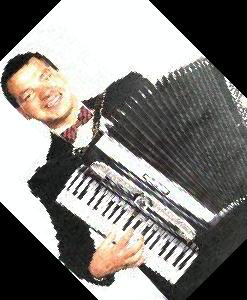

In [6]:
images[0] 

In [147]:
import numpy as np

sample_images = listdir(output_path)

data = []
images = []

for im in sample_images:
    img = Image.open(join(output_path,im))
    images.append(img)
    data.append(np.array(list(img.getdata())))
    
data = np.array(data)


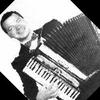

In [148]:
images[0]

In [149]:
from sklearn.utils.extmath import cartesian
# SETUP 2D SPACE
x = np.linspace(1,10 , 10)
y = np.linspace(1, 10, 10)
nodes = cartesian([x,y])

# For each node we initialize the weights to the values of a randomly picked data point in the data array
# This can be done by simply picking a random set of vectors from the data array

weights = []
for i in range(0,len(nodes)):
    idx = np.random.choice(len(data))
    weights.append(data[idx])

weights = np.array(weights)

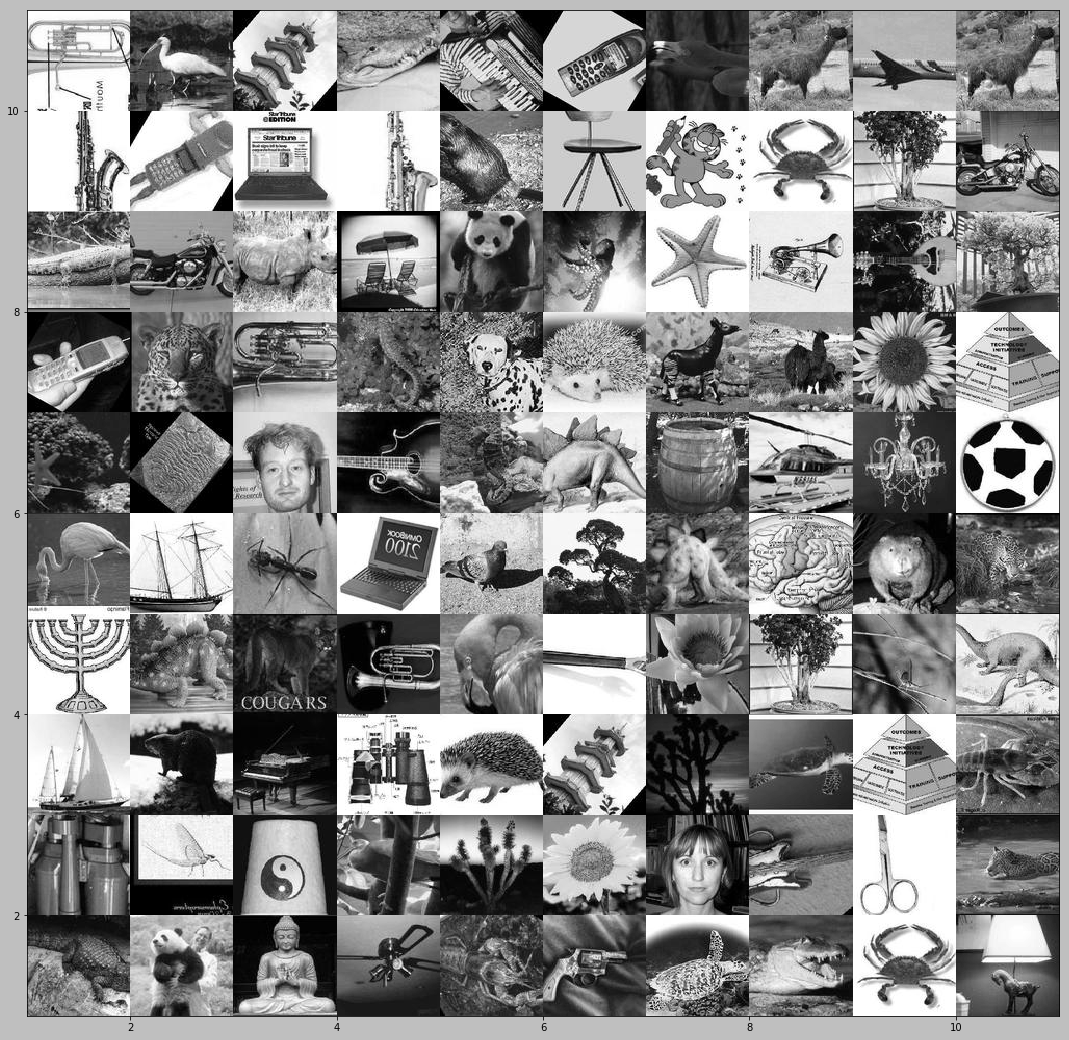

In [150]:
from matplotlib import pyplot as plt
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

# Create figure
fig = plt.figure()
ax = fig.add_subplot(111)

# Plots an image at each x and y location. 
def plotImage(x, y, im):
    bb = Bbox.from_bounds(x,y,1,1)  
    bb2 = TransformedBbox(bb,ax.transData)
    bbox_image = BboxImage(bb2,
                        norm = None,
                        origin=None,
                        clip_on=False)

    bbox_image.set_data(im)
    ax.add_artist(bbox_image)

ridx = np.random.choice(len(images), 100)

for i in range(0,len(nodes)):
    im = Image.new('L', (100,100))
    im.putdata(weights[i])
    plotImage(nodes[i,0],nodes[i,1],im)

fig.set_size_inches(18.5,18.5)    
ax.set_ylim(1,11)
ax.set_xlim(1,11)
plt.style.use('grayscale')
plt.show()

In [163]:
# data is our high dimension data
# our low dimension data are the nodes

from scipy.spatial.distance import cdist

for i in range(20000):
    idx = np.random.choice(len(data))
    random_image = np.array([data[idx]])
    distances_to_weights = cdist(weights,random_image,'euclidean')
    winning_node_index = np.argmin(distances_to_weights)
    winning_node = np.array([nodes[winning_node_index]])
    node_distances = cdist(nodes,winning_node,'euclidean')
    gaussian = np.exp(-1*node_distances/0.5)
    update = (random_image-weights)*gaussian*0.1
    weights = weights + update

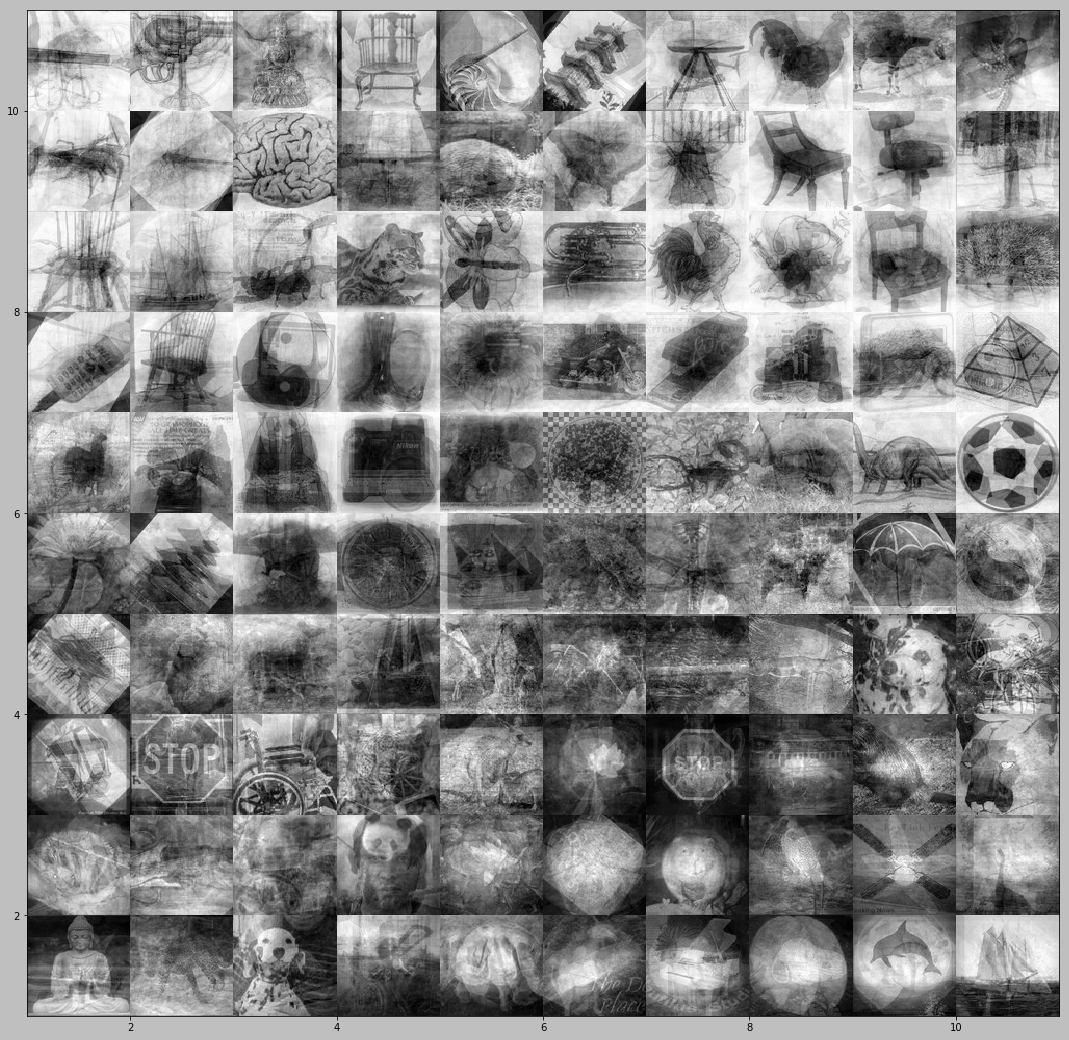

In [164]:
# Create figure
fig = plt.figure()
ax = fig.add_subplot(111)

# Plots an image at each x and y location. 
def plotImage(x, y, im):
    bb = Bbox.from_bounds(x,y,1,1)  
    bb2 = TransformedBbox(bb,ax.transData)
    bbox_image = BboxImage(bb2,
                        norm = None,
                        origin=None,
                        clip_on=False)

    bbox_image.set_data(im)
    ax.add_artist(bbox_image)

ridx = np.random.choice(len(images), 100)

for i in range(0,len(nodes)):
    im = Image.new('L', (100,100))
    im.putdata(weights[i])
    plotImage(nodes[i,0],nodes[i,1],im)

fig.set_size_inches(18.5,18.5)    
ax.set_ylim(1,11)
ax.set_xlim(1,11)
plt.style.use('grayscale')
plt.show()